In [1]:
import pandas as pd

# Load the dataset
training_data_path = 'sprint3_transactions.csv'  # Update the path as necessary
data = pd.read_csv(training_data_path)

#Preview the data
print(data.head())

   competition_id        Amount        V1        V2        V3        V4  \
0          200001   5384.439941  1.073515 -0.357867  0.403438 -0.489846   
1          200002  17982.099610  0.115433 -0.126228  1.760780  0.465503   
2          200003   6901.490234 -0.134323 -0.409743  1.272522 -0.338456   
3          200004  14278.969730 -0.538880 -1.353725  0.316332 -0.270522   
4          200005    210.350006  0.975284 -0.338808  0.802451 -0.201451   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0  0.350531  0.427065  0.413984 -0.145682  ... -0.211017 -0.232020 -0.865567   
1  0.338733  0.655035  0.492372 -0.093471  ... -0.419567  0.015181  0.808545   
2  0.973651  0.591710  0.462300 -0.128050  ...  0.405960 -0.148264 -0.494632   
3 -0.038734  1.534834  2.479669 -0.156215  ...  1.870997  0.136272 -0.175280   
4  0.110070  0.066379  0.442581 -0.168338  ... -0.288194 -0.097900  0.000855   

        V23       V24       V25       V26       V27       V28  Class

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Split the target and the variables for the model
X = data.drop('Class', axis=1)
y = data['Class']

#Insert missing values as mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.utils import to_categorical

#Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Model summary
model.summary()

/Users/DaveManderson/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,274 (24.51 KB)

 Trainable params: 6,274 (24.51 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Train the model
history = model.fit(X_train, y_train_encoded, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
4716/4716 - 3s - 679us/step - accuracy: 0.9972 - loss: 0.0128 - val_accuracy: 0.9987 - val_loss: 0.0057
Epoch 2/100
4716/4716 - 3s - 532us/step - accuracy: 0.9984 - loss: 0.0064 - val_accuracy: 0.9988 - val_loss: 0.0047
Epoch 3/100
4716/4716 - 3s - 592us/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9988 - val_loss: 0.0052
Epoch 4/100
4716/4716 - 3s - 690us/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9988 - val_loss: 0.0041
Epoch 5/100
4716/4716 - 3s - 726us/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9990 - val_loss: 0.0042
Epoch 6/100
4716/4716 - 3s - 659us/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 7/100
4716/4716 - 3s - 716us/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9991 - val_loss: 0.0034
Epoch 8/100
4716/4716 - 3s - 658us/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 9/100
4716/4716 - 3s - 640us/step - accuracy: 0.9993 - loss: 0.002

Epoch 70/100
4716/4716 - 3s - 646us/step - accuracy: 0.9998 - loss: 6.1513e-04 - val_accuracy: 0.9991 - val_loss: 0.0114
Epoch 71/100
4716/4716 - 3s - 677us/step - accuracy: 0.9998 - loss: 8.5792e-04 - val_accuracy: 0.9992 - val_loss: 0.0086
Epoch 72/100
4716/4716 - 3s - 682us/step - accuracy: 0.9999 - loss: 3.7323e-04 - val_accuracy: 0.9992 - val_loss: 0.0083
Epoch 73/100
4716/4716 - 3s - 676us/step - accuracy: 0.9999 - loss: 4.7437e-04 - val_accuracy: 0.9992 - val_loss: 0.0077
Epoch 74/100
4716/4716 - 3s - 687us/step - accuracy: 0.9999 - loss: 5.0953e-04 - val_accuracy: 0.9993 - val_loss: 0.0083
Epoch 75/100
4716/4716 - 3s - 736us/step - accuracy: 0.9998 - loss: 9.7593e-04 - val_accuracy: 0.9991 - val_loss: 0.0116
Epoch 76/100
4716/4716 - 3s - 719us/step - accuracy: 0.9999 - loss: 2.9484e-04 - val_accuracy: 0.9992 - val_loss: 0.0104
Epoch 77/100
4716/4716 - 3s - 738us/step - accuracy: 0.9998 - loss: 7.1941e-04 - val_accuracy: 0.9993 - val_loss: 0.0096
Epoch 78/100
4716/4716 - 3s - 71

In [6]:
#Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f"Test accuracy: {accuracy*100:.2f}%")

1474/1474 - 1s - 398us/step - accuracy: 0.9992 - loss: 0.0250
Test accuracy: 99.92%


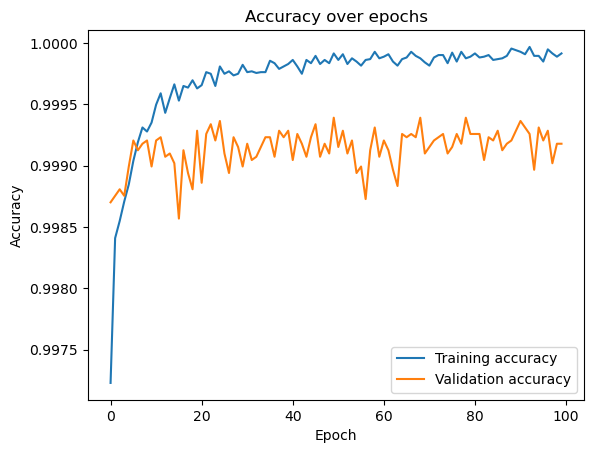

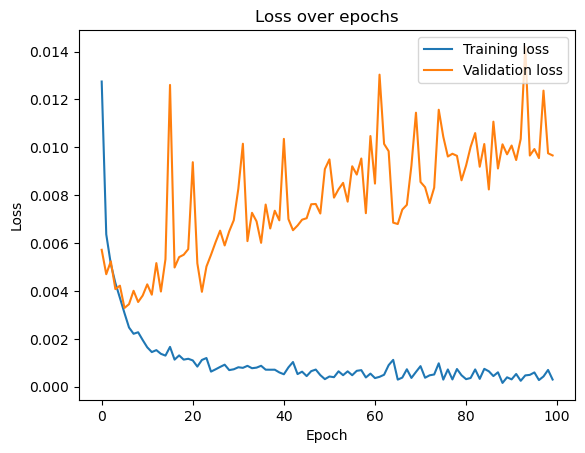

In [7]:
import matplotlib.pyplot as plt

#Accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()